# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Reading the csv

In [2]:
car = pd.read_csv('car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.shape

(301, 9)

In [4]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


# Checking outliers

In [6]:
car.describe(percentiles = [0.25, 0.50, 0.75, 0.90, 0.95])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

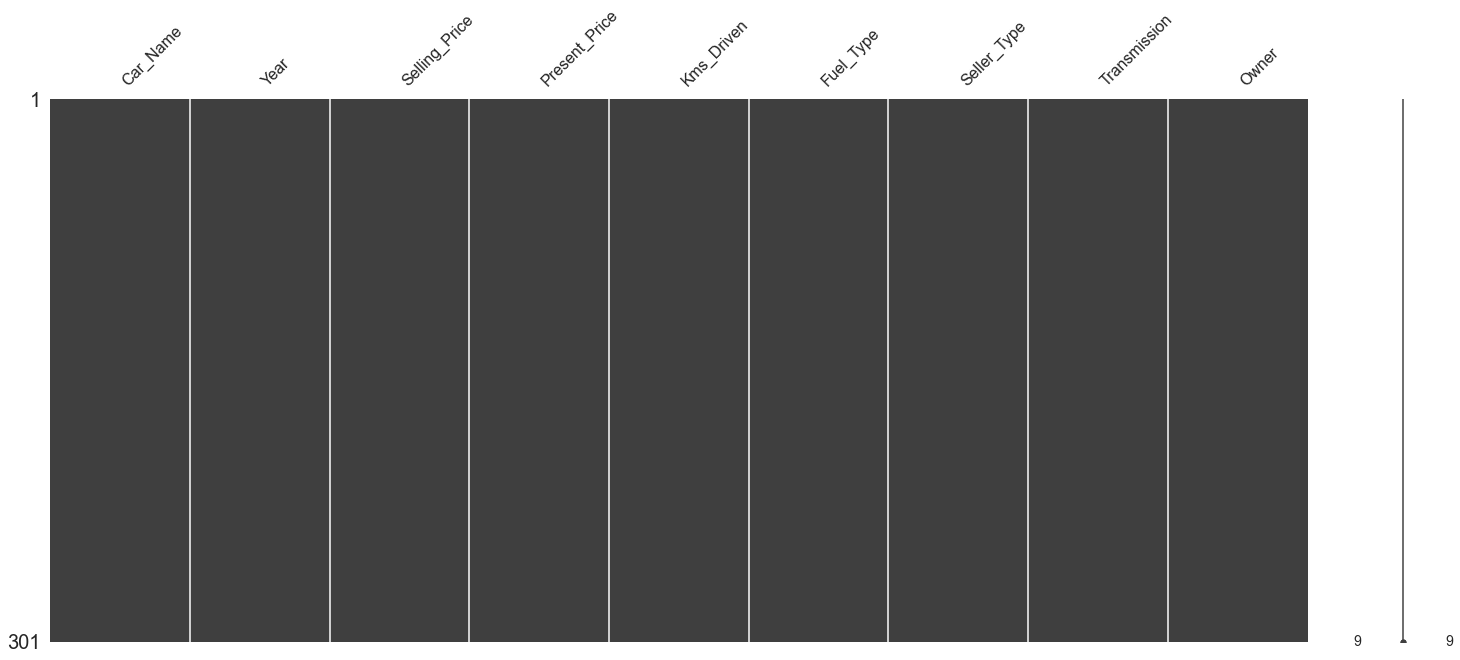

In [7]:
import missingno as mn
mn.matrix(car)

* Removing the Year feature as it is not important

In [8]:
car.drop('Year', axis = 1, inplace = True)

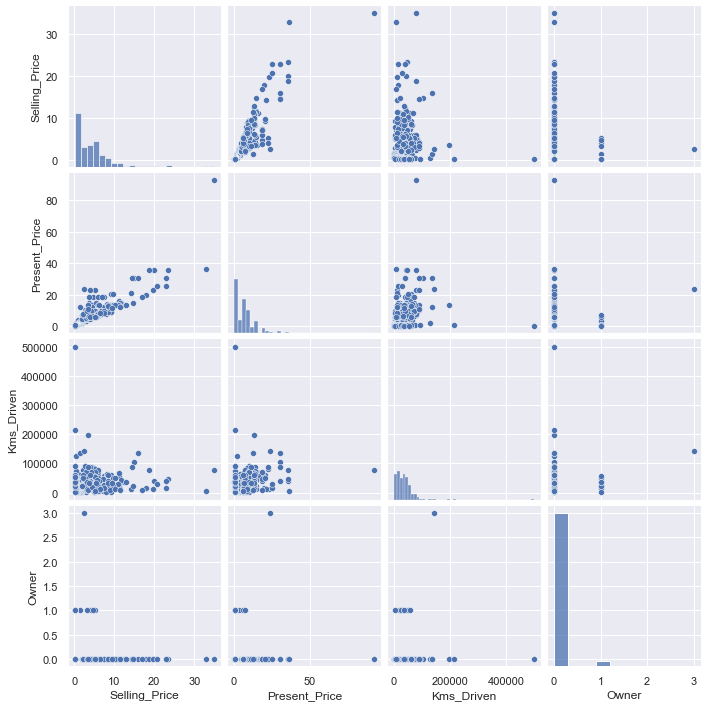

In [9]:
sns.pairplot(car)

<AxesSubplot:>

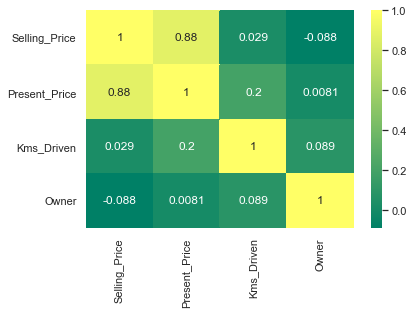

In [10]:
sns.heatmap(car.corr(), annot = True, cmap = 'summer')

In [11]:
car.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Univariate analysis

c:\users\pratik\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

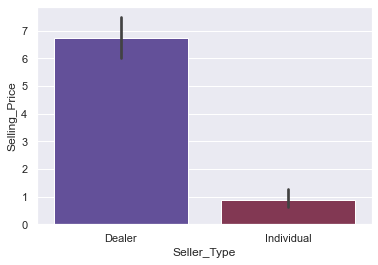

In [12]:
sns.barplot('Seller_Type', 'Selling_Price', data = car, palette = 'twilight')

* As we see here, selling price is higher when there is a dealer involved

c:\users\pratik\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

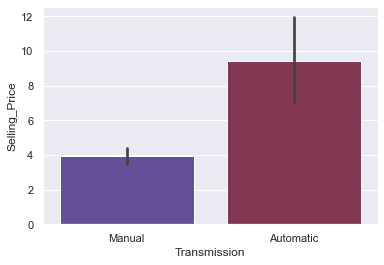

In [13]:
sns.barplot('Transmission', 'Selling_Price', data = car, palette = 'twilight')

* As we see here, Selling price is higher when the car has automatic feature.

c:\users\pratik\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

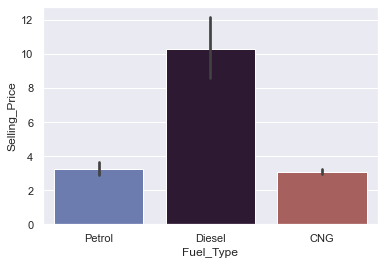

In [14]:
sns.barplot('Fuel_Type', 'Selling_Price', data = car, palette = 'twilight')

* Dieseal fuel type is preferred over other types.

c:\users\pratik\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

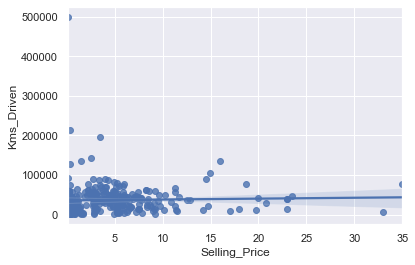

In [15]:
sns.regplot('Selling_Price', 'Kms_Driven', data = car)

* The less the kms, the higher the selling price.

In [16]:
fuel = pd.get_dummies(car['Fuel_Type'])
transmission = pd.get_dummies(car['Transmission'],drop_first=True)
seller= pd.get_dummies(car['Seller_Type'],drop_first=True)

In [17]:
fuel.drop('CNG',axis=1,inplace=True)

In [18]:
car= pd.concat([car,fuel,transmission,seller],axis=1)

In [19]:
car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diesel,Petrol,Manual,Individual
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,1,0
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1,0
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,1,0
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,1,0
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1,0


In [20]:
car.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [21]:
# The column car name doesn't seem to add much value to our analysis and hence dropping the column

car= car.drop('Car_Name',axis=1)

# Splitting the data

In [22]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test = train_test_split(car, test_size = 0.33, random_state = 100)

In [23]:
num_vars=['Selling_Price','Present_Price','Kms_Driven']

# Scaling the data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [25]:
X_train[num_vars]= scaler.fit_transform(X_train[num_vars])
X_test[num_vars]= scaler.transform(X_test[num_vars])

c:\users\pratik\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\pratik\python36-32\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\users\pratik\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Defining X and y

In [26]:
y_train = X_train.pop('Selling_Price')
x_train = X_train

# Defining model

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
lm= LinearRegression()
lm.fit(x_train, y_train)

rfe= RFE(lm,10) # RFE (estimator, number_of_feature_selected)
rfe = rfe.fit(x_train, y_train)

c:\users\pratik\python36-32\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


* RFE ranking the features, which should be used.

In [29]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Present_Price', True, 1),
 ('Kms_Driven', True, 1),
 ('Owner', True, 1),
 ('Diesel', True, 1),
 ('Petrol', True, 1),
 ('Manual', True, 1),
 ('Individual', True, 1)]

In [30]:
col = x_train.columns[rfe.support_]
col

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Diesel', 'Petrol', 'Manual',
       'Individual'],
      dtype='object')

In [31]:
x_train_rfe = x_train[col]

In [32]:
import statsmodels.api as sm
x_train_rfe= sm.add_constant(x_train_rfe)

In [33]:
model = sm.OLS(y_train,x_train_rfe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           9.11e-78
Time:                        10:58:50   Log-Likelihood:                -90.167
No. Observations:                 201   AIC:                             196.3
Df Residuals:                     193   BIC:                             222.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0581      0.396      0.147      0.883      -0.722       0.838
Present_Price     0.7217      0.036     19.989      0.000       0.651       0.793
Kms_Driven       -0.1590      0.028     -5.636      0.000      -0.215      -0.103
Owner             0.0321      0.150      0.214      0.831      -0.264       0.328
Diesel            0.7186      0.393      1.829      0.069      -0.056       1.493
Petrol            0.2266      0.389      0.582      0.561      -0.541       0.994
Manual           -0.3429      0.082     -4.171      0.000      -0.505      -0.181
Individual       -0.2606      0.067     -3.898      0.000      -0.392      -0.129
==============================================================================
Omnibus:                       32.433   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.033
Skew:                           0.543   Prob(JB):                     5.22e-27
Kurtosis:                       6.643   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* P value of owner and petrol is > than 0.05 and hence we will drop these columns.

In [34]:
x_train1 = x_train_rfe.drop(['Owner', 'Petrol'], axis = 1)

In [35]:
# add_constant = adding a ones array (an intercept)
x_train2= sm.add_constant(x_train1)
model1= sm.OLS(y_train, x_train2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     232.0
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.75e-80
Time:                        10:58:50   Log-Likelihood:                -90.369
No. Observations:                 201   AIC:                             192.7
Df Residuals:                     195   BIC:                             212.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2837      0.081      3.518      0.001       0.125       0.443
Present_Price     0.7218      0.036     20.073      0.000       0.651       0.793
Kms_Driven       -0.1596      0.028     -5.685      0.000      -0.215      -0.104
Diesel            0.4935      0.078      6.293      0.000       0.339       0.648
Manual           -0.3434      0.082     -4.206      0.000      -0.504      -0.182
Individual       -0.2574      0.066     -3.878      0.000      -0.388      -0.126
==============================================================================
Omnibus:                       32.381   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.394
Skew:                           0.547   Prob(JB):                     1.19e-26
Kurtosis:                       6.614   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_train_new = x_train2.drop('const', axis = 1)

# Variance Inflation factor (VIF)
* We use VIF to detect whether we have collinearity in our data set.
# Now the question arises, what is collinearity ?
* Collinearity occurs in our data when two or more features (independent variables) are correlated to each other.
* This means that if one feature can be predicted from another feature.

* Let me take a simple example from our everyday life to explain this. A person loves listening to music and eating while         coding. The more coding he does, the more he eats and listens to music and the happier he gets!

   Now, if we could quantify happiness and measure person’s happiness while he’s busy doing his favorite activity, which do you    think would have a greater impact on his happiness? eating or listening music? That’s difficult to determine                    because the moment we try to measure person’s happiness from eating , he starts coding. And the moment we try to measure his    happiness from coding, he starts eating.

   Eating and coding are highly correlated in the case of this person and we cannot individually determine the impact of the      individual activities on his happiness. This is the multicollinearity problem!

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Manual,1.97
4,Individual,1.82
2,Diesel,1.66
0,Present_Price,1.59
1,Kms_Driven,1.06


# We capture no collinearity in these features as they are < 5.

In [38]:
y_train_pred = model1.predict(x_train2)

c:\users\pratik\python36-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

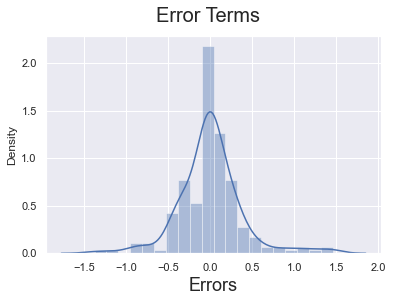

In [39]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [40]:
#Dividing the test set into features and target.

y_test = X_test.pop('Selling_Price')
x_test = X_test

In [41]:
# Predicting the values by extracting the columns that our final model had

X_test_pred= x_test[x_train_new.columns]

X_test_pred= sm.add_constant(X_test_pred)

In [42]:
y_pred= model1.predict(X_test_pred)

Text(0, 0.5, 'y_pred')

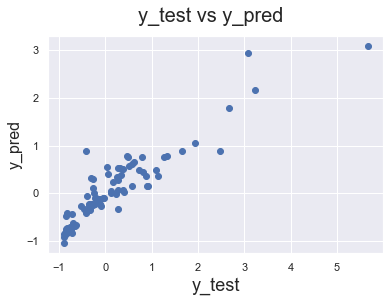

In [43]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [44]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df.head()

,Actual,Predicted
199,-0.892270,-0.923144
201,-0.267516,0.288931
111,-0.686680,-0.693052
125,-0.736581,-0.786171
46,-0.387277,-0.374601


# R2_score as metrics

In [45]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.8084923556137182

# Trying SVM

In [70]:
from sklearn.svm import SVR
sv = SVR(C = 10).fit(x_train2, y_train)

In [71]:
# Predicting the values by extracting the columns that our final model had

X_test_pred= X_test[x_train_new.columns]

X_test_pred= sm.add_constant(X_test_pred)

In [72]:
y_pred1 = sv.predict(X_test_pred)

Text(0, 0.5, 'y_pred')

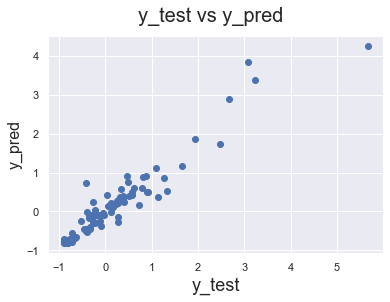

In [73]:
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [74]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred1})
df.head()

,Actual,Predicted
199,-0.892270,-0.795916
201,-0.267516,-0.139487
111,-0.686680,-0.714583
125,-0.736581,-0.771391
46,-0.387277,-0.519334


In [75]:
R2 = r2_score(y_test,y_pred1)
R2

0.9163744549186214

* As we see here, svm is performing well as compared to linear regression.
* Let's try grid search to find out best parameters for SVM.

In [77]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train2, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [78]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.01)


In [79]:
y_pred2 = grid.predict(X_test_pred) 

Text(0, 0.5, 'y_pred')

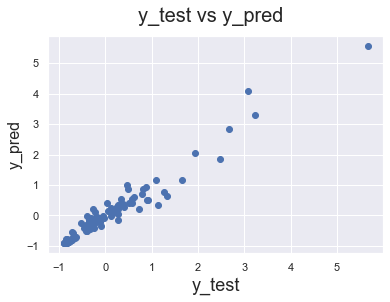

In [80]:
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [81]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred2})
df.head()

,Actual,Predicted
199,-0.892270,-0.918770
201,-0.267516,-0.115958
111,-0.686680,-0.736395
125,-0.736581,-0.763915
46,-0.387277,-0.501282


In [82]:
R2 = r2_score(y_test,y_pred2)
R2

0.946953305857142

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(x_train2, y_train)

In [89]:
y_pred4 = rf.predict(X_test_pred)

Text(0, 0.5, 'y_pred')

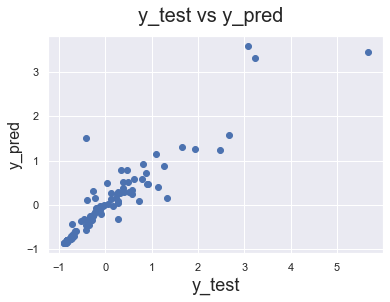

In [90]:
fig = plt.figure()
plt.scatter(y_test,y_pred4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [91]:
r2_score(y_test, y_pred4)

0.838088982795154

In [98]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [99]:
grid_search.fit(x_train2, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': [2, 3, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [100]:
# print best parameter after tuning 
print(grid_search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search.best_estimator_) 

{'bootstrap': True, 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestRegressor(max_depth=20, max_features=5, min_samples_leaf=3,
                      min_samples_split=8)


In [101]:
y_pred5 = grid_search.predict(X_test_pred)

Text(0, 0.5, 'y_pred')

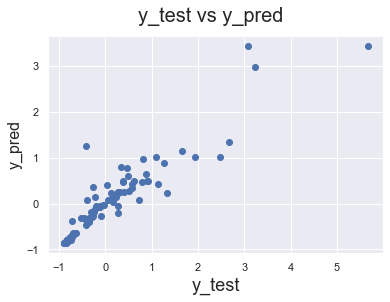

In [102]:
fig = plt.figure()
plt.scatter(y_test,y_pred5)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [103]:
r2_score(y_test, y_pred5)

0.8339129237015147

c:\users\pratik\python36-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

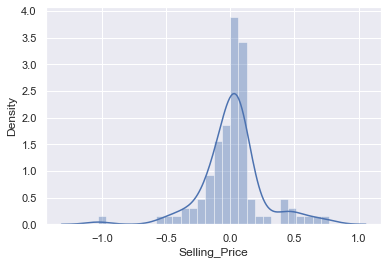

In [116]:
sns.distplot(y_test - y_pred2)

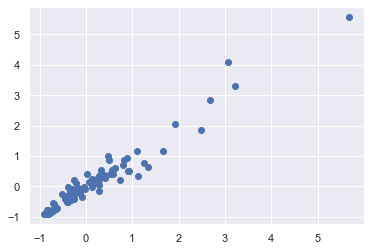

In [117]:
plt.scatter(y_test, y_pred2)

In [113]:
from sklearn import metrics

In [114]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MSE: 0.057112688947086404
RMSE: 0.23898261222751416


In [115]:
import pickle
file = open('grid.pkl', 'wb')
pickle.dump(grid, file)